Машинное обучение.
Лабораторная работа 5.

Исполнитель: Ошмарин Никита ФЗ-11-2020 НБ 4 курс

Цель: построить модель нечеткого управления газом/тормозом автомобиля, находящегося в пробке, в зависимости от расстояния впереди идущего автомобиля и своей текущей скорости.

Задачи:
1. Составить набор правил нечеткой логики.
2. Протестировать полученную модель.
3. В заключении указать полученные новые навыки, умения, знания.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# класс, описывающий отдельное правило
# toLingVarVelocity - функция принадлежности для нечеткой переменной текущей скорости авто
# toLingVarDistance - функция принадлежности для нечеткой переменной расстояния до впереди идущего авто
# operator - оператор применяемый к условиям (and or -> min max)
# outputLingVar - значение выходной лингвистической переменной
class Rule:
  def __init__(self, toLingVarVelocity, toLingVarDistance, operator, outputLingVar):
    self.toLingVarVelocity = toLingVarVelocity
    self.toLingVarDistance = toLingVarDistance
    self.operator = operator
    self.outputLingVar = outputLingVar

In [3]:
# обобщенные функции принадлежности
def left(x, x1, x2):
  if (x <= x1):
    return 1
  if (x1 < x < x2):
    return (x2 - x) / (x2 - x1)
  return 0

def trapeze(x, x1, x2, x3, x4):
  if (x <= x1):
    return 0
  if (x1 < x < x2):
    return (x - x1) / (x2 - x1)
  if (x2 <= x <= x3):
    return 1
  if (x3 < x < x4):
    return (x4 - x) / (x4 - x3)
  return 0

def triangle(x, x1, x2, x3):
  if (x <= x1):
    return 0
  if (x1 < x <= x2):
    return (x - x1) / (x2 - x1)
  if (x2 < x < x3):
    return (x3 - x) / (x3 - x2)
  return 0

def right(x, x1, x2):
  if (x <= x1):
    return 0
  if (x1 < x < x2):
    return (x - x1) / (x2 - x1)
  return 1

In [4]:
# входная лингвистическая переменная текущей скорости авто
def fLowVelocity(x):
  # низкая скорость
  return left(x, 0, 10)

def fMediumVelocity(x):
  # средняя скорость
  return triangle(x, 5, 15, 25)

def fHighVelocity(x):
  # высокая скорость
  return right(x, 20, 25)

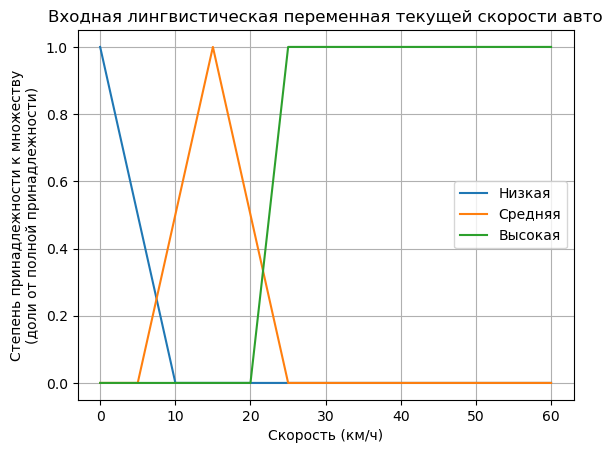

In [5]:
x = np.arange(0, 60, 0.01)

low = [fLowVelocity(i) for i in x]
mid = [fMediumVelocity(i) for i in x]
high = [fHighVelocity(i) for i in x]

fig, ax = plt.subplots()

ax.plot(x, low, label="Низкая")
ax.plot(x, mid, label="Средняя")
ax.plot(x, high, label="Высокая")
ax.grid()
ax.legend()

ax.set_title('Входная лингвистическая переменная текущей скорости авто')
ax.set_xlabel('Скорость (км/ч)')
ax.set_ylabel('Степень принадлежности к множеству\n(доли от полной принадлежности)')
plt.show()

In [6]:
# входная лингвистическая переменная расстояния до впереди идущего автомобиля
def fLowDistance(x):
  # маленькое расстояние до впереди идущего авто
  return left(x, 15, 25)

def fMediumDistance(x):
  # среднее расстояние до впереди идущего авто
  return triangle(x, 15, 25, 35)

def fHighDistance(x):
  # большое расстояние до впереди идущего авто
  return right(x, 25, 35)

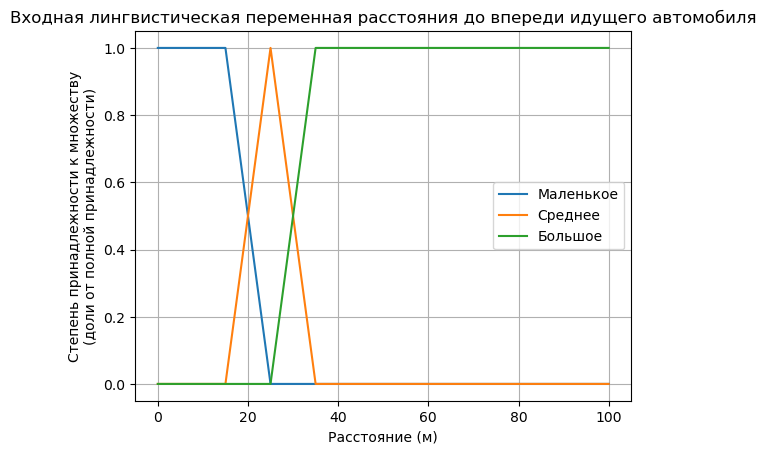

In [7]:
x = np.linspace(0, 100, 101)

low = [fLowDistance(i) for i in x]
mid = [fMediumDistance(i) for i in x]
high = [fHighDistance(i) for i in x]

fig, ax = plt.subplots()

ax.plot(x, low, label="Маленькое")
ax.plot(x, mid, label="Среднее")
ax.plot(x, high, label="Большое")
ax.grid()
ax.legend()

ax.set_title('Входная лингвистическая переменная расстояния до впереди идущего автомобиля')
ax.set_xlabel('Расстояние (м)')
ax.set_ylabel('Степень принадлежности к множеству\n(доли от полной принадлежности)')
plt.show()

In [8]:
# выходная лингвистическая переменная степени нажатия на газ/тормоз [-1.0 1.0]
def fHighBrake(x):
  # сильный тормоз
  return left(x, -0.5, 0)

def fMediumBrake(x):
  # средний тормоз
  return triangle(x, -1, -0.25, 0.5)

#def fNothingBrakeGas(x):
#  # не нажимать ничего
#  return triangle(x, -0.1, 0, 0.1)

def fMediumGas(x):
  # средний газ
  return triangle(x, -0.5, 0.25, 1)

def fHighGas(x):
  # сильный газ
  return right(x, 0, 1.5)

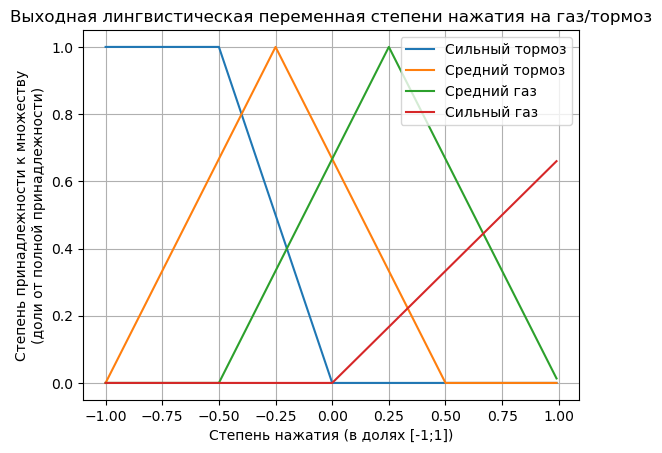

In [9]:
x = np.arange(-1.0, 1.0, 0.01)

highb = [fHighBrake(i) for i in x]
medb = [fMediumBrake(i) for i in x]
#nothing = [fNothingBrakeGas(i) for i in x]
medg = [fMediumGas(i) for i in x]
highg = [fHighGas(i) for i in x]

fig, ax = plt.subplots()

ax.plot(x, highb, label="Сильный тормоз")
ax.plot(x, medb, label="Средний тормоз")
#ax.plot(x, nothing, label="Ничего не делать")
ax.plot(x, medg, label="Средний газ")
ax.plot(x, highg, label="Сильный газ")

ax.grid()
ax.legend()

ax.set_title('Выходная лингвистическая переменная степени нажатия на газ/тормоз')
ax.set_xlabel('Степень нажатия (в долях [-1;1])')
ax.set_ylabel('Степень принадлежности к множеству\n(доли от полной принадлежности)')
plt.show()

In [10]:
# список правил нечеткой логики
rules = []

# правила

# если низкая скорость и большое расстояние, то выжми газ сильно
rules.append(Rule(fLowVelocity, fHighDistance, "and", fHighGas))

# если низкая скорость и среднее расстояние, то выжми газ средне
rules.append(Rule(fLowVelocity, fMediumDistance, "and", fMediumGas))

# если низкая скорость и маленькое расстояние, то выжми тормоз сильно
rules.append(Rule(fLowVelocity, fLowDistance, "and", fHighBrake))

# если средняя скорость и большое расстояние, то выжми газ средне
rules.append(Rule(fMediumVelocity, fHighDistance, "and", fMediumGas))

# если средняя скорость и среднее расстояние, то выжми тормоз сильно
rules.append(Rule(fMediumVelocity, fMediumDistance, "and", fHighBrake))

# если средняя скорость и маленькое расстояние, то выжми тормоз сильно
rules.append(Rule(fMediumVelocity, fLowDistance, "and", fHighBrake))

# если высокая скорость и большое расстояние, то выжми газ средне
rules.append(Rule(fHighVelocity, fHighDistance, "and", fMediumGas))

# если высокая скорость и среднее расстояние, то выжми тормоз сильно
rules.append(Rule(fHighVelocity, fMediumDistance, "and", fHighBrake))

# если высокая скорость и маленькое расстояние, то выжми тормоз сильно
rules.append(Rule(fHighVelocity, fLowDistance, "and", fHighBrake))

In [11]:
# функция, ограничивающая результат функции принадлежности сверху
def applyUpperLimit(result, limit):
  if (result > limit):
    return limit
  return result

In [12]:
# функция вычисления степени нажатия на газ/тормоз в зависимости от текущего расстояни и скорости
def computeRules(in_velocity, in_distance, rules):
  result_list = []
  for rule in rules:
    if (rule.operator == "and"):
      alpha = min(rule.toLingVarVelocity(in_velocity), rule.toLingVarDistance(in_distance))
      result_list.append((alpha, rule.outputLingVar))
    elif (rule.operator == "or"):
      alpha = max(rule.toLingVarVelocity(in_velocity), rule.toLingVarDistance(in_distance))
      result_list.append((alpha, rule.outputLingVar))
  # сгруппируем результат по функциям принадлежности и найдем в каждой максимум
  total_dict = {fHighBrake: 0,
                fMediumBrake: 0,
                fMediumGas: 0,
                fHighGas: 0}
  for result in result_list:
    if (total_dict[result[1]] < result[0]):
      total_dict[result[1]] = result[0]
  # дефазификация
  x = np.arange(-1, 1, 0.001)
  y_general = []
  for f, v in total_dict.items():
    yi = []
    for xi in x:
      y_i = applyUpperLimit(f(xi), v)
      yi.append(y_i)
    y_general.append(yi)
  y = [-1 for i in range(len(x))]
  for i in range(len(total_dict.items())):
    for j in range(len(x)):
      if (y_general[i][j] > y[j]):
        y[j] = y_general[i][j]
  summ_num = 0.0
  summ_den = 0.0
  for j in range(len(x)):
      summ_num += x[j] * y[j]
      summ_den += y[j]
  summ_center = (summ_num / summ_den)
  return (summ_center, x, y)

In [13]:
# функция подсчета пройденного расстояния в зависимости от предыдущей и текущей скорости
# * (8 / 15) - это привидение из км/ч в м/с
def calcTraveledDist(prevV, nextV):
  if (nextV > prevV):
    return (prevV + nextV) * 0.5 * (8 / 15)
  if (nextV < prevV):
    return (3 * prevV - nextV) * 0.5 * (8 / 15)
  return prevV * (8 / 15)

In [14]:
# массив моментов времени (секунд)
frontCarV_space = np.linspace(0, 200, 201)

# функция получения скоростей по моментам времени для впереди идущей машины
def get_front_car_V(spaces):
  # массив значений скорости в каждый момент времени (секунду)
  v = []
  for sp in spaces:
    # волнообразная функция
    x = np.cos(sp / 10) * 15
    if (x < 0):
      v.append(0)
    else:
      v.append(x)
  return v
frontCarV = get_front_car_V(frontCarV_space)


# зададим начальную и текущую скорость (км/ч)
prevV = 10
currentV = 10

myCarV = []
myCarGasBrake = []
distances = []

# коэффициенты влияния степени газа/тормоза
gas = 11 # 1.0 степени газа увеличивает скорость на 11 км/ч за секунду
brake = 22 # -1.0 степени тормоза затармаживают автомобиль на 22 км/ч за секунду

prevVfront = frontCarV[0] # скорость впереди идущей машины в предыдущий момент

distFront = 30
distMy = 0

argslist = []
# цикл по массиву скоростей впереди идущей машины
for frontV in frontCarV:
  # получаем пройденное расстояние впереди идущей машиной
  distFront += calcTraveledDist(prevVfront, frontV)
  prevVfront = frontV

  # считаем пройденное расстояние нашей машиной
  distMy += calcTraveledDist(prevV, currentV)

  # расстояние между машинами
  distBetween = distFront - distMy
  distances.append(distBetween)

  # если дистанция отрицательная, то мы столкнулись
  if (distBetween < 0):
    print("Авария!!!")
    break

  # вычисляем степень нажатия газ/тормоз
  gasbrakeRate, _, _ = computeRules(currentV, distBetween, rules)
  argslist.append((currentV, distBetween, gasbrakeRate))
  prevV = currentV
  # если нажали газ, считаем добавку к скорости за 1 секунду
  if (gasbrakeRate > 0):
    currentV += gas * gasbrakeRate
  # если нажали тормоз, считаем сколько сбросили скорости за 1 секунду
  elif (gasbrakeRate < 0):
    currentV += brake * gasbrakeRate

  # замедляем автомобиль (лобовое сопротивление, трение колес и т.д.)
  currentV = 0.95 * currentV - 0.5

  # если получилось, что скорость стала отрицательной -> обнуляем
  if (currentV < 0):
    currentV = 0
  myCarV.append(currentV)
  myCarGasBrake.append(gasbrakeRate)

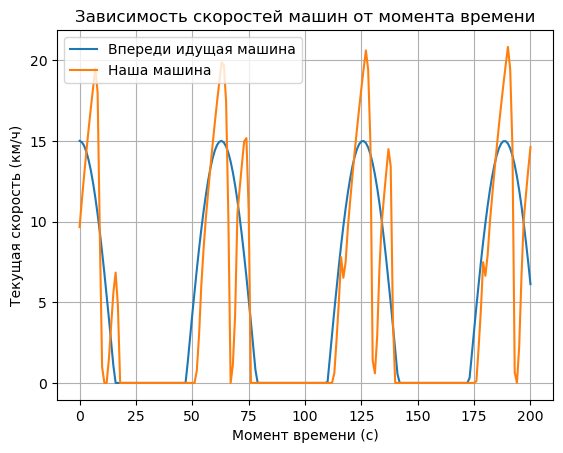

In [15]:
fig, ax = plt.subplots()

ax.plot(frontCarV_space, frontCarV, label="Впереди идущая машина")
ax.plot(frontCarV_space[:len(myCarV)], myCarV, label="Наша машина")
ax.grid()
ax.legend()
ax.set_title('Зависимость скоростей машин от момента времени')
ax.set_xlabel('Момент времени (с)')
ax.set_ylabel('Текущая скорость (км/ч)')
plt.show()

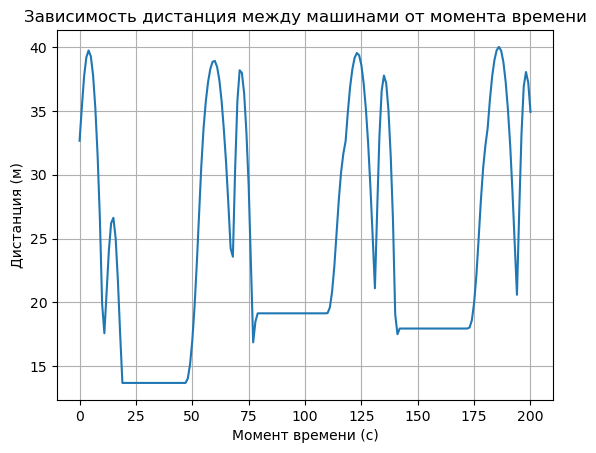

In [16]:
fig, ax = plt.subplots()

ax.plot(frontCarV_space[:len(distances)], distances)

ax.grid()
ax.set_title('Зависимость дистанция между машинами от момента времени')
ax.set_xlabel('Момент времени (с)')
ax.set_ylabel('Дистанция (м)')
plt.show()

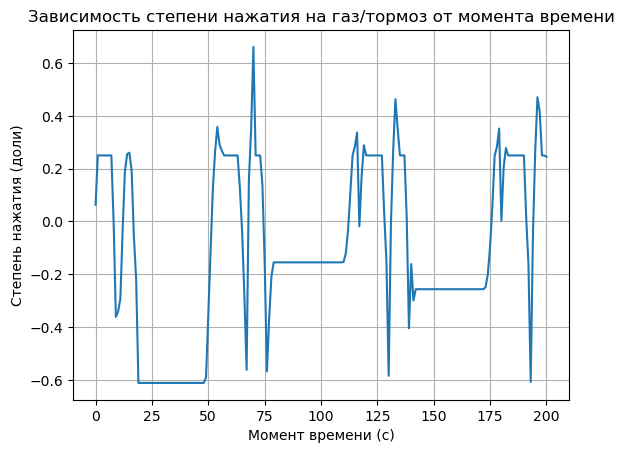

In [17]:
fig, ax = plt.subplots()

ax.plot(frontCarV_space[:len(myCarGasBrake)], myCarGasBrake)

ax.grid()
ax.set_title('Зависимость степени нажатия на газ/тормоз от момента времени')
ax.set_xlabel('Момент времени (с)')
ax.set_ylabel('Степень нажатия (доли)')
plt.show()

**Интепретация графиков**

На графике зависимости скоростей машин от момента времени видно, что наша машина запаздывает во времени т.к. принимает решение о степени нажатия газа/тормоза реагируя на действия впереди идущей машины.

На графике зависимости дистанции между машинами от момента времени видно, что алгоритм пытается соблюсти  минимально допустимое расстояние между машинами (когда дистанция увеличивается -> пытается ее сократить; когда дистанция мала -> тормозит и ждет увеличения дистанции).

На графике зависимости степени нажатия на газ/тормоз от момента времени мы наблюдаем, какие действия алгоритм предпринимал от момента времени. Также прослеживается небольшая периодичность повтора похожих действий (это зависит от функции скорости впереди идущей машины).

**Заключение**

1. В ходе работы была построена модель нечеткого управления степенью нажатия на газ/тормоз автомобиля, находящегося в пробке, в зависимости от расстояния впереди идущего автомобиля и своей текущей скорости; проведено ее тестирование. В целом модель успешно справилась в рамках данного тестового примера.

3. В ходе работы были получены навыки по работе с моделью нечеткой логики, созданы и использованы лингвистические переменные, сформулированы правила нечеткой логики, изучены и написаны фазификация и дефазификация нечетких переменных, написана модель нечеткого управления.

